# Case Study (Part - II)

1.Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

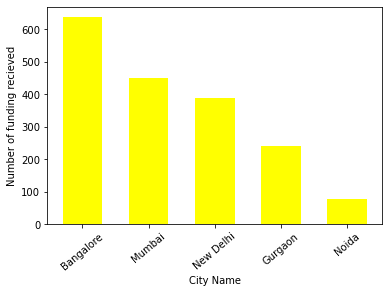

Bangalore


In [74]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from collections import Counter
pd=pd.read_csv('Dataset/startup_funding.csv') # reading data from startup_funding.csv file
df=pd.copy() #copying the data in df variable
df.loc[df['AmountInUSD'].isnull(),'AmountInUSD' ]='0' #replacing the nan amount with zero

df.drop(df.index[df.CityLocation.isnull()],inplace=True) # droping all the nan values.
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore' #replace bangalore with Bangalore as it is wrongly spelled 
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi' #replace Delhi with New Delhi as it is wrongly spelled 
df.reset_index(inplace=True, drop=True) # resetting the index number
d = {}   #empty dictionary to store cityname and the values as the number of times the city has recieved funding

for i in df["CityLocation"]: #iterating the CityLocation to store city name as keys and values as the number of times the city has recieved funding
    if "Bangalore" in i:
        d["Bangalore"] = d.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d["Mumbai"] = d.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d["New Delhi"] = d.get("New Delhi",0) + 1
    elif "Noida" in i:
        d["Noida"] = d.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d["Gurgaon"] = d.get("Gurgaon",0) + 1

x=list(d.keys())
y=list(d.values())
od=dict(Counter(d).most_common(1)) # for extracting the city which have highiest number of funding.

plt.bar(x,y,width=0.6,color='yellow') # ploting in the bar-gargh x-axis as city name and y-axis as number of times the city has recieved funding
plt.xlabel('City Name') # given label to x-axis
plt.ylabel('Number of funding recieved') # giving label to y-axis
plt.xticks(rotation=40)# rotating each cityname by 40 degree angel
plt.show() # to show the graph

for i in range(len(od)): #for printing the city having highest number of funding
    print(x[i])
        

2. Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [103]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from collections import Counter
pd=pd.read_csv('Dataset/startup_funding.csv') # reading data from startup_funding.csv file
df=pd.copy() #copying the data in df variable
df.drop(df.index[df.InvestorsName.isnull()],inplace=True) # droping all the nan values.
investors=[] # decraling empty list for appending the values after removing Undisclosed investors
for row in df.InvestorsName: # iterating InvestorsName column for removing the Undisclosed investors and appending it to investors list
    if  ('Undisclosed' not in row) or ('undisclosed' not in row):
        for i in row.split(','): #there are multiple investor in a single line seprated by ',' so by using split it will divide the investor names based on ','
            i=i.strip() # to remove extra spaces before and after the investors name
            investors.append(i)
d={}
for i in investors: #iterating to get investor names as keys and number of times the investors has invested
    d[i]=d.get(i,0)+1
od=dict(Counter(d).most_common(5)) # getting top 5 investors name
x=list(od)
y=list(od.values())
for i in range(len(x)):#iterating to print the investor name
    print(x[i])               

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
pd=pd.read_csv('Dataset/startup_funding.csv')
df=pd.copy()
df.loc[df.StartupName=='Ola Cabs','StartupName']='Ola' #correcting spelling for important startups name as mentioned in the question(Ola, Flipkart, Oyo and Paytm.)
df.loc[df.StartupName=='Olacabs','StartupName']='Ola'
df.loc[df.StartupName=='Flipkart.com','StartupName']='Flipkart'
df.loc[df.StartupName=='Oyo Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='Oyorooms','StartupName']='Oyo'
df.loc[df.StartupName=='OYO Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='Paytm Marketplace','StartupName']='Paytm'
df.drop(df.index[df.InvestorsName.isnull()],inplace=True) # droping all the nan values.
d = {} #creating an empty dictionary to store investors name as the key and set of startup name in which they have invested as the values.
for i in df.index:
    k = df["InvestorsName"][i].strip()
    if "," in k:
        for j in k.strip().split(','): #here we have multiple investor investing in a single startup so i have used spilt() and strip() to split the investors name and iterate each investor seprately
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = k.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}  #created a dictionary where key is investor's name and value is count of startup's in which they had invested..
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
od=dict(Counter(d1).most_common(5)) # getting top 5 investors name who has invested maximum number of times.
for i in od:
    print(i)


    

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


In [7]:
d

{'Kae Capital': {'Azuro',
  'Daily Rounds',
  'Frsh',
  'Frsh.co.in',
  'Fynd',
  'HandyHome',
  'HealthKart',
  'Hypernova Interactive',
  'LearnTron',
  'ListUp',
  'Loantap',
  'Nudgespot',
  'Parentune',
  'Shopsense',
  'The Porter',
  'TouchKin',
  'Truebil',
  'TrulyMadly.com',
  'Trupay',
  'numberz.in'},
 'Triton Investment Advisors': {'Ethinos'},
 'Kashyap Deorah': {'Leverage Edu', 'Meesho', 'Springboard'},
 'Anand Sankeshwar': {'Leverage Edu', 'ShopsUp'},
 'Deepak Jain': {'Leverage Edu'},
 'Sadashiva NT': {'Leverage Edu'},
 'Arjun Mehta': {'Leverage Edu'},
 'Satish Kaul': {'Leverage Edu'},
 'Anindya Ghose': {'Leverage Edu'},
 'Kunal Shah': {'Bharat Bazaar',
  'Cookifi',
  'Daily Ninja',
  'Flyrobe',
  'Innov8',
  'Lets Reap',
  'LifCare',
  'ListUp',
  'Pianta',
  'Pocket Aces',
  'ShaadiSaga',
  'Spinny',
  'TableHero',
  'Twigly',
  'UnaAcademy',
  'Zepo',
  'enCashea'},
 'LetsVenture': {'Aisle',
  'Betaout',
  'BookEventz',
  'CollateBox',
  'FalconBrick',
  'Footprints E

4.  Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
pd=pd.read_csv('Dataset/startup_funding.csv')
df=pd.copy()
df.loc[df.StartupName=='Ola Cabs','StartupName']='Ola' #correcting spelling for important startups name as mentioned in the question(Ola, Flipkart, Oyo and Paytm.)
df.loc[df.StartupName=='Olacabs','StartupName']='Ola'
df.loc[df.StartupName=='Flipkart.com','StartupName']='Flipkart'
df.loc[df.StartupName=='Oyo Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='Oyorooms','StartupName']='Oyo'
df.loc[df.StartupName=='OYO Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='Paytm Marketplace','StartupName']='Paytm'
df.drop(df.index[df.InvestorsName.isnull()],inplace=True) # droping all the nan values.
df.loc[df.InvestmentType=='PrivateEquity','InvestmentType']='Private Equity' #correcting spelling for the names of investment types  
df.loc[df.InvestmentType=='SeedFunding','InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='Crowd funding','InvestmentType']='Crowd Funding'
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) #replacing the undisclosed investors name by null values ..
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
#df.drop(df.index[df.InvestmentType.isnull()], inplace=True)#droping the null value in investment type column
#df.reset_index(inplace=True, drop=True)
d={}
df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')] #filtering the investment column and selecgting only Seed Funding and Crowd Funding ivestment type
d = {} #creating an empty dictionary to store investors name as the key and set of startup name in which they have invested as the values.
for i in df.index:
    k = df["InvestorsName"][i].strip()
    if "," in k:
        for j in k.strip().split(','): #here we have multiple investor investing in a single startup so i have used spilt() and strip() to split the investors name and iterate each investor seprately
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = k.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
d1 = {}  #created a dictionary where key is investor's name and value is count of startup's in which they had invested..
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
od=dict(Counter(d1).most_common(5)) # getting top 5 investors name who has invested maximum number of times.
for i in od:
    print(i)



Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
pd=pd.read_csv('Dataset/startup_funding.csv')
df=pd.copy()
df.loc[df.StartupName=='Ola Cabs','StartupName']='Ola' #correcting spelling for important startups name as mentioned in the question(Ola, Flipkart, Oyo and Paytm.)
df.loc[df.StartupName=='Olacabs','StartupName']='Ola'
df.loc[df.StartupName=='Flipkart.com','StartupName']='Flipkart'
df.loc[df.StartupName=='Oyo Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='Oyorooms','StartupName']='Oyo'
df.loc[df.StartupName=='OYO Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='Paytm Marketplace','StartupName']='Paytm'
df.drop(df.index[df.InvestorsName.isnull()],inplace=True) # droping all the nan values.
df.loc[df.InvestmentType=='PrivateEquity','InvestmentType']='Private Equity' #correcting spelling for the names of investment types  
df.loc[df.InvestmentType=='SeedFunding','InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='Crowd funding','InvestmentType']='Crowd Funding'
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) #replacing the undisclosed investors name by null values .
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df=df[(df.InvestmentType=='Private Equity')] #filtering the investment column and selecting only Private Equity ivestment type
d = {} #creating an empty dictionary to store investors name as the key and set of startup name in which they have invested as the values.
for i in df["InvestorsName"].values:  #iterating through the investor names to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names then spliting it and traversing through each names separately.
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] #deleting the NULL key from dictionary


od=dict(Counter(d).most_common(5)) # getting top 5 investors name who has invested maximum number of times.
for i in od:
    print(i)



Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Blume Ventures


In [5]:
d

{'Kae Capital': 10,
 'Triton Investment Advisors': 1,
 'Infuse Ventures': 6,
 'JLL': 1,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 38,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 47,
 'Jungle Ventures': 10,
 'Shailesh Rao': 1,
 'Venture Highway': 2,
 'BCCL': 1,
 'Mitsui & Co.': 2,
 'Dunamis Ventures Pte Ltd': 1,
 'SBI-FMO Fund': 1,
 'Bessemer Venture Partners': 13,
 'Catamaran Ventures': 3,
 'Corvus Ventures': 1,
 'MAPE Advisory Group': 1,
 'Blacksoil Capital Pvt. Ltd': 1,
 'IDG Ventures India Advisors': 1,
 'One97 Communication Ltd': 1,
 'ain Capital Ventures': 1,
 'Renaud Laplanche': 1,
 'Stellaris Venture Partners': 3,
 'Tencent Holdings': 3,
 'Goldman Sachs': 6,
 'HBM Healthcare Investments': 2,
 'Maverick Capital Ventures': 2,
 'Sequoia India': 15,
 'Omidyar Network and Kae Capital': 1,
 'Info Edge (India) Ltd': 8,
 'TVS Motor Company': 1,
 'Emerging India': 1,
 'blockchain 

3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
pd=pd.read_csv('Dataset/startup_funding.csv')
df=pd.copy()
df.loc[df.StartupName=='Ola Cabs','StartupName']='Ola' #correcting spelling for important startups name as mentioned in the question(Ola, Flipkart, Oyo and Paytm.)
df.loc[df.StartupName=='Olacabs','StartupName']='Ola'
df.loc[df.StartupName=='Flipkart.com','StartupName']='Flipkart'
df.loc[df.StartupName=='Oyo Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyoRooms','StartupName']='Oyo'
df.loc[df.StartupName=='Oyorooms','StartupName']='Oyo'
df.loc[df.StartupName=='OYO Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='Paytm Marketplace','StartupName']='Paytm'
df.dropna(subset = ["InvestorsName"],inplace = True)

for i in df["InvestorsName"].values:  #iterating through the investor names to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names then spliting it and traversing through each names separately.
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] 
od=dict(Counter(d).most_common(5)) # getting top 5 investors name who has invested maximum number of times.
for i in od:
    print(i)




NameError: name 'd' is not defined

In [1]:
d

NameError: name 'd' is not defined

In [ ]:
Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures